# Airlines Customer Satisfaction

### This data shows whether a customer is satisfied with the airlines or not after travelling with them. This data given by an airline organization. The actual name of the company is not given due to various purposes that's why the name Invistico airlines. The data is a combination of several criteria based on the feedback taken from the customers as well as their demographic data.

### Since this is a fairly large data set, I will try my best to give a high value of precision and recall by discarding as little data as possible.

#### Importing the Libraries :

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
plt.style.use("seaborn-whitegrid")
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import cufflinks as cf
cf.go_offline()

sns.set_style("whitegrid")
import scipy.stats as stats

#sns.set(rc={'figure.figsize':(9,5)})

#### Importing the data :

In [3]:
data1 = pd.read_csv('C:\\Users\Shubham\Documents\Self Learning\Airlines Customer Satisfaction\Invistico_Airline.csv')

#### Checking the sanity of the data :

In [4]:
data1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
data1.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [7]:
data1.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
round(data1.isnull().mean()*100,2) 

satisfaction                         0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Seat comfort                         0.0
Departure/Arrival time convenient    0.0
Food and drink                       0.0
Gate location                        0.0
Inflight wifi service                0.0
Inflight entertainment               0.0
Online support                       0.0
Ease of Online booking               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Cleanliness                          0.0
Online boarding                      0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.3
dtype: float64

The data is already very clean, with very few null values against the category **Arrival Delay in Minutes**. The amount of data missing is **0.3 percent**.

In [9]:
data1.fillna(data1['Arrival Delay in Minutes'].median(), inplace=True)

In [10]:
data1.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

**Since such a small percentage of data was missing, it is wiser in such instances to impute the data.** 

In [11]:
data1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [12]:
data1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
data1['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [14]:
data1['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [15]:
data1['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [16]:
data1['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

As we can see, the categorical values in the data are in the columns **Gender** , **Satisfaction**, **Customer Type**, **Type of Travel** and **Travel Class**.

For encoding Categorical Variables in this case, we have two options - 
* One Hot Encoding
* Label Encoding

The problem with **One Hot Encoding** is that it increases the dimensionality of the data set, but the results are quite predictable as it does not produce any ordinal values that might interfere with the learning of the model.

On the other hand, with **Label Encoding**, we will not have any increase in dimensionality, but this process will give us ordinal values which might interfere with the learning of the model. 
For example, Label Encoding might label Female as 0 and Male as 1 which might make the model react in such a way that it might associate the 'Male' category to having a higher importance than the 'Female' Category.

#### One Hot Encoding :

In [17]:
data2 = data1[['satisfaction','Gender', 'Customer Type', 'Type of Travel']] 

In [18]:
data2.head(2)

,satisfaction,Gender,Customer Type,Type of Travel
0,satisfied,Female,Loyal Customer,Personal Travel
1,satisfied,Male,Loyal Customer,Personal Travel


In [19]:
cat_cols = ['satisfaction','Gender', 'Customer Type', 'Type of Travel']
data2 = pd.get_dummies(data2, columns = cat_cols)

In [20]:
data2.head()

,satisfaction_dissatisfied,satisfaction_satisfied,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,0,1,1,0,1,0,0,1
1,0,1,0,1,1,0,0,1
2,0,1,1,0,1,0,0,1
3,0,1,1,0,1,0,0,1
4,0,1,1,0,1,0,0,1


The categories I have decided to encode with **One Hot Encoding** have only 2 unique values each, so in order to decrease dimensionality, we can drop a few columns and still make perfect sense.

In [21]:
data2.drop(['satisfaction_dissatisfied','Gender_Female','Customer Type_disloyal Customer', 'Type of Travel_Business travel'], axis = 1, inplace = True)

In [22]:
data2.head(2)

,satisfaction_satisfied,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel
0,1,0,1,1
1,1,1,1,1


In [23]:
data2['satisfaction_satisfied'].unique()

array([1, 0], dtype=uint8)

In [24]:
data2['Gender_Male'].unique()

array([0, 1], dtype=uint8)

In [25]:
data2['Customer Type_Loyal Customer'].unique()

array([1, 0], dtype=uint8)

In [26]:
data2['Type of Travel_Personal Travel'].unique()

array([1, 0], dtype=uint8)

#### Label Encoding :

The feature **Class**, which basically represent the Travel Class a person has chosen, can be encoded using Label Encoding because there is some sort of ordinality in *Business Class*, *Economy Plus* and *Economy*, in matters of expense, comfort, etc.

In [27]:
Class_mapping = {"Business": 1,"Eco": 3, "Eco Plus": 2 }
data1['Class']  = data1['Class'].map(Class_mapping)

In [28]:
data1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,3,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,1,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,3,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,3,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,3,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


### Assimilation of Data :

In [29]:
data1.drop(['satisfaction','Gender','Customer Type', 'Type of Travel'], axis = 1, inplace = True)

In [30]:
frames = [data2, data1]
data = pd.concat(frames, axis = 1)

In [31]:
data.head()

,satisfaction_satisfied,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,1,65,3,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,1,1,47,1,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,1,1,15,3,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,1,1,60,3,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,1,1,70,3,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [32]:
data.describe()

,satisfaction_satisfied,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.547328,0.492616,0.816908,0.309416,39.427957,1.970350,1981.409055,2.838597,2.990645,2.851994,...,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.045465
std,0.497757,0.499947,0.386743,0.462255,15.119360,0.962636,1027.115606,1.392983,1.527224,1.443729,...,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.416353
min,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,50.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,27.000000,1.000000,1359.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,40.000000,2.000000,1925.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,51.000000,3.000000,2544.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,1.000000,1.000000,1.000000,85.000000,3.000000,6951.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_satisfied             129880 non-null  uint8  
 1   Gender_Male                        129880 non-null  uint8  
 2   Customer Type_Loyal Customer       129880 non-null  uint8  
 3   Type of Travel_Personal Travel     129880 non-null  uint8  
 4   Age                                129880 non-null  int64  
 5   Class                              129880 non-null  int64  
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

### Exploratory Data Analysis :

In [34]:
data.head(1)

,satisfaction_satisfied,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,1,65,3,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0


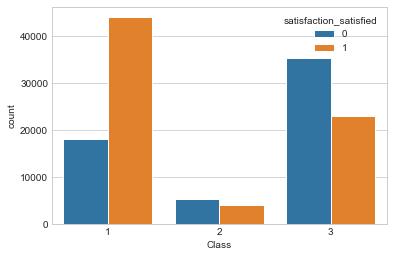

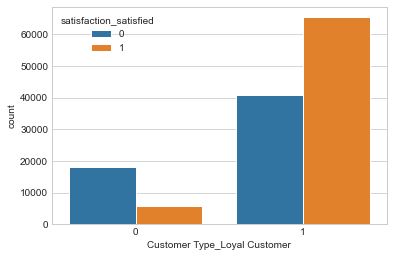

In [35]:
sns.countplot(x='Class',hue='satisfaction_satisfied',data=data)
plt.show()
sns.countplot(x="Customer Type_Loyal Customer", hue='satisfaction_satisfied', data=data)
plt.show()

**Business Class** passengers tend to be satisfied more with their experience than **Economy Class** passengers. **Economy Plus** passengers in the middle are tending to be nearly equal in the number of both satisfied customers and dissatisfied customers.

**Loyal Customers** tend to be satisfied more than floating customers.

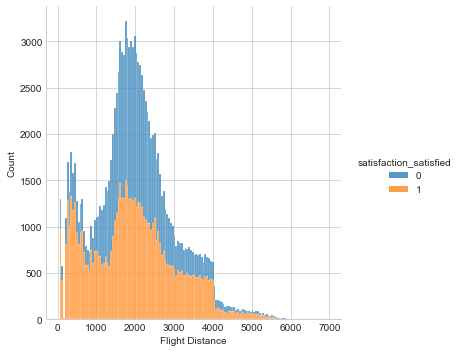

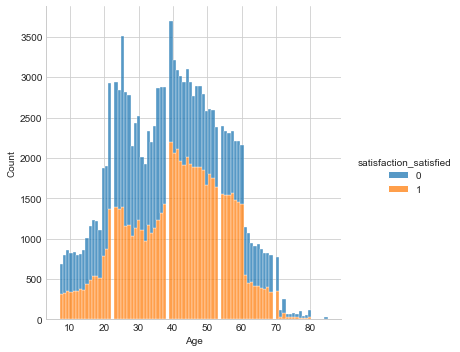

In [36]:
sns.displot(data=data, x="Flight Distance",  hue="satisfaction_satisfied", multiple="stack")
plt.show()
sns.displot(data=data, x="Age",  hue="satisfaction_satisfied", multiple="stack")
plt.show()

We can see from the above plots that **Flight Distance** has a significant effect on the number of dissatisfied passengers. Around the mark **2000** the number of dissatisfied customers outnumber the satisfied passengers.

However the **Age** of a passenger does not seem to have any effect on the satisfaction level of the passengers as both the categories have a nearly identical distribution in the second plot.

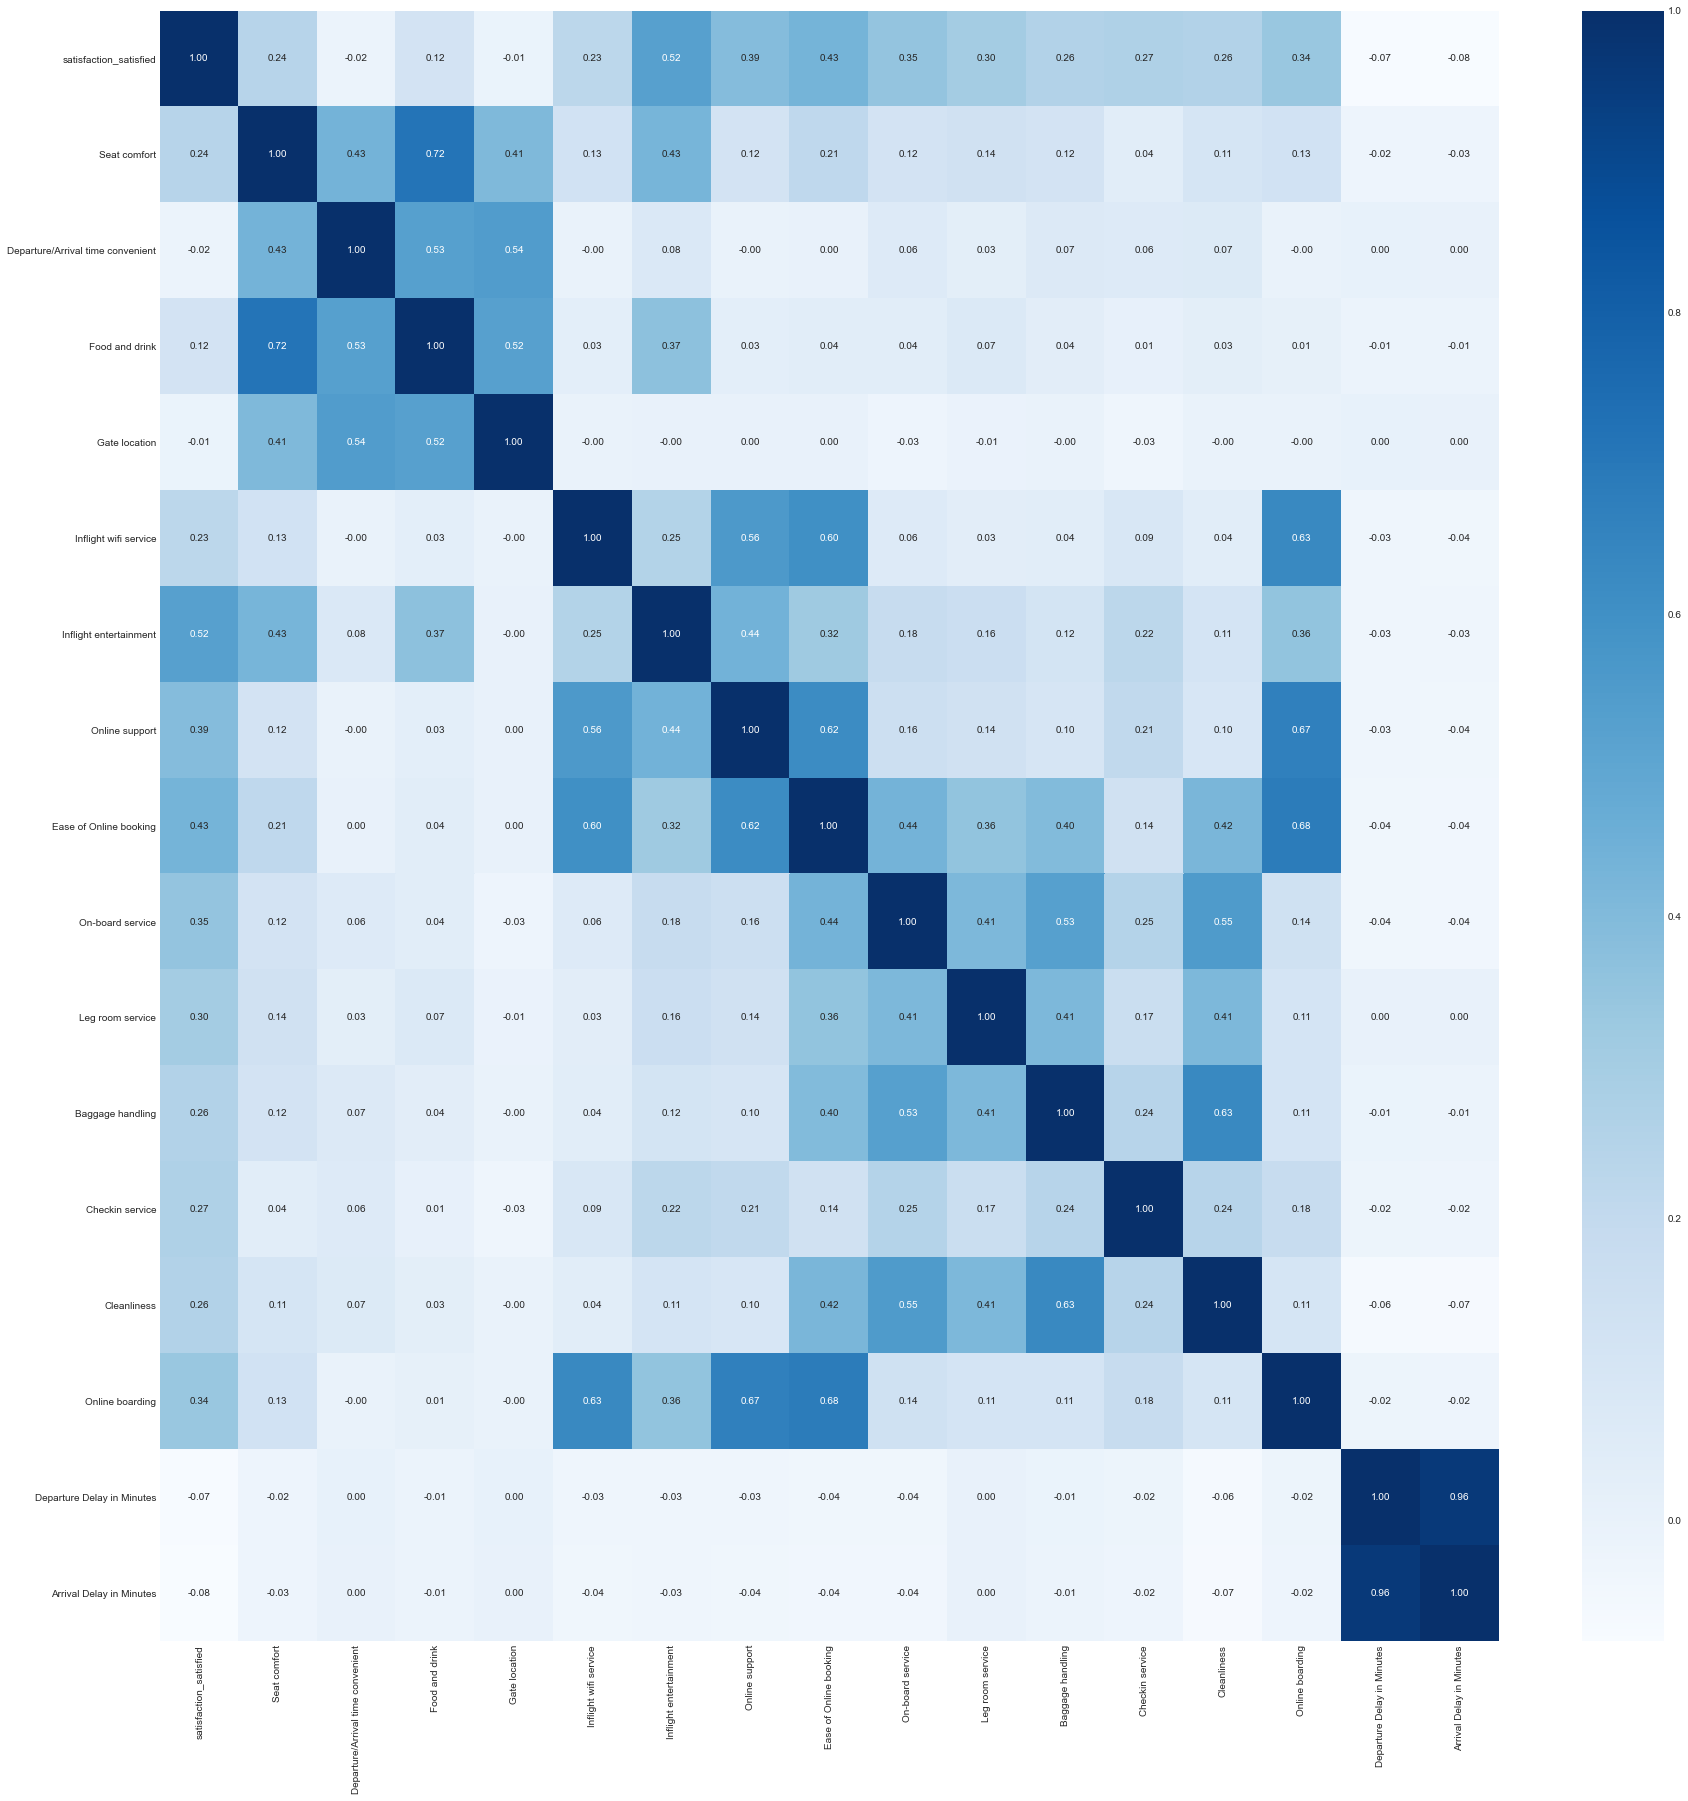

In [38]:
lst1 =["satisfaction_satisfied", "Seat comfort" ,"Departure/Arrival time convenient" ,"Food and drink"
, "Gate location" ,"Inflight wifi service","Inflight entertainment","Online support","Ease of Online booking"
,"On-board service","Leg room service","Baggage handling","Checkin service","Cleanliness","Online boarding"
,"Departure Delay in Minutes", "Arrival Delay in Minutes"]
plt.subplots(figsize=(30,30)) 
sns.heatmap(data[lst1].corr(), annot = True, cmap="Blues", fmt = ".2f")
plt.show()

**We can see from the above heatmap that following factors have very minimal effect on the satisfaction of a customer:**
* **Arrival Delay in Minutes**
* **Departure Delay in Minutes**
* **Gate Location**
* **Departure/Arrival time convenient**

So we can drop the aforementioned features.

### Dataframe Manipulation :

In [39]:
data.head(1)

,satisfaction_satisfied,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,1,65,3,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0


In [40]:
data.drop(['Arrival Delay in Minutes','Departure Delay in Minutes','Gate location','Departure/Arrival time convenient','Age'], inplace = True, axis=1)

In [41]:
data.head(10)

,satisfaction_satisfied,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,0,1,1,3,265,0,0,2,4,2,3,3,0,3,5,3,2
1,1,1,1,1,1,2464,0,0,0,2,2,3,4,4,4,2,3,2
2,1,0,1,1,3,2138,0,0,2,0,2,2,3,3,4,4,4,2
3,1,0,1,1,3,623,0,0,3,4,3,1,1,0,1,4,1,3
4,1,0,1,1,3,354,0,0,4,3,4,2,2,0,2,4,2,5
5,1,1,1,1,3,1894,0,0,2,0,2,2,5,4,5,5,4,2
6,1,0,1,1,3,227,0,0,2,5,5,5,5,0,5,5,5,3
7,1,1,1,1,3,1812,0,0,2,0,2,2,3,3,4,5,4,2
8,1,0,1,1,1,73,0,0,5,3,5,4,4,0,1,5,4,4
9,1,1,1,1,3,1556,0,0,2,0,2,2,2,4,5,3,4,2


#### Feature Scaling :
We should apply feature scaling on the **Flight Distance** column as it consists of numerically large values which might affect the model into assigning more weight for this feature.

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[['Flight Distance']] = sc.fit_transform(data[['Flight Distance']])

In [43]:
data.head(10)

,satisfaction_satisfied,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,0,1,1,3,-1.671103,0,0,2,4,2,3,3,0,3,5,3,2
1,1,1,1,1,1,0.469852,0,0,0,2,2,3,4,4,4,2,3,2
2,1,0,1,1,3,0.152458,0,0,2,0,2,2,3,3,4,4,4,2
3,1,0,1,1,3,-1.322552,0,0,3,4,3,1,1,0,1,4,1,3
4,1,0,1,1,3,-1.584452,0,0,4,3,4,2,2,0,2,4,2,5
5,1,1,1,1,3,-0.085102,0,0,2,0,2,2,5,4,5,5,4,2
6,1,0,1,1,3,-1.708100,0,0,2,5,5,5,5,0,5,5,5,3
7,1,1,1,1,3,-0.164937,0,0,2,0,2,2,3,3,4,5,4,2
8,1,0,1,1,1,-1.858035,0,0,5,3,5,4,4,0,1,5,4,4
9,1,1,1,1,3,-0.414180,0,0,2,0,2,2,2,4,5,3,4,2


#### Separating Dependent and Independent Variabales :

In [44]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [45]:
X.shape

(129880, 17)

In [46]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [47]:
y = y.reshape(129880, 1)

In [48]:
y.shape

(129880, 1)

#### Splitting the dataset into the Training set and Test set :

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Creating Models :

#### Importing Metrics :

In [59]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import average_precision_score

#### Logistic Regression :

In [51]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [53]:
y_pred = classifier.predict(X_test)

Making the Confusion Matrix  :

In [63]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11861  2759]
 [ 2784 15066]]


In [62]:
accuracy_score(y_test, y_pred)

0.8292885740683708

In [61]:
average_precision_score(y_test, y_pred)

0.799132572637523

In [58]:
recall_score(y_test, y_pred)

0.8440336134453782

In [73]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8276597615790502

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

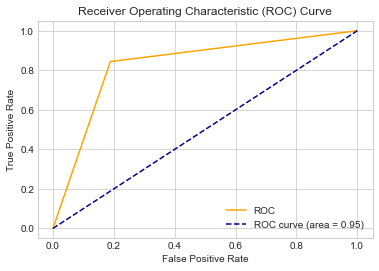

In [77]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### K-NN Classifier : 

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier01 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier01.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
y_pred01 = classifier01.predict(X_test)

In [67]:
print(confusion_matrix(y_test, y_pred01))

[[13678   942]
 [ 1525 16325]]


In [68]:
print(accuracy_score(y_test, y_pred01))

0.9240221743147521


In [69]:
print(classification_report(y_test, y_pred01))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     14620
           1       0.95      0.91      0.93     17850

    accuracy                           0.92     32470
   macro avg       0.92      0.93      0.92     32470
weighted avg       0.92      0.92      0.92     32470



In [74]:
auc = roc_auc_score(y_test, y_pred01)
auc

0.9250667708944043

In [80]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred01)

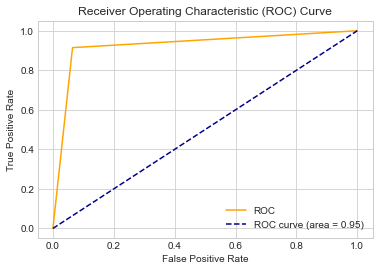

In [81]:
plt.plot(fpr1, tpr1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Surprisingly, **K-NN Classifier** is giving us a much higher accuracy score than Logistic Regression.

#### Random Forest Classifier :

In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier02 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier02.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [71]:
y_pred02 = classifier02.predict(X_test)

**Random Forest** is giving a still higher accuracy score.

In [72]:
print(accuracy_score(y_test, y_pred02))
print(confusion_matrix(y_test, y_pred02))
print(classification_report(y_test, y_pred02))

0.946720049276255
[[13985   635]
 [ 1095 16755]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     14620
           1       0.96      0.94      0.95     17850

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [75]:
auc = roc_auc_score(y_test, y_pred02)
auc

0.9476109048270471

In [82]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred02)

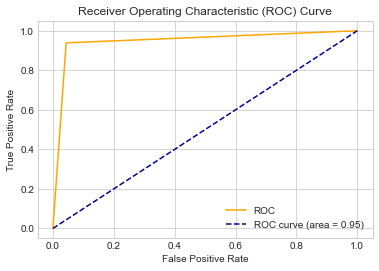

In [83]:
plt.plot(fpr2, tpr2, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

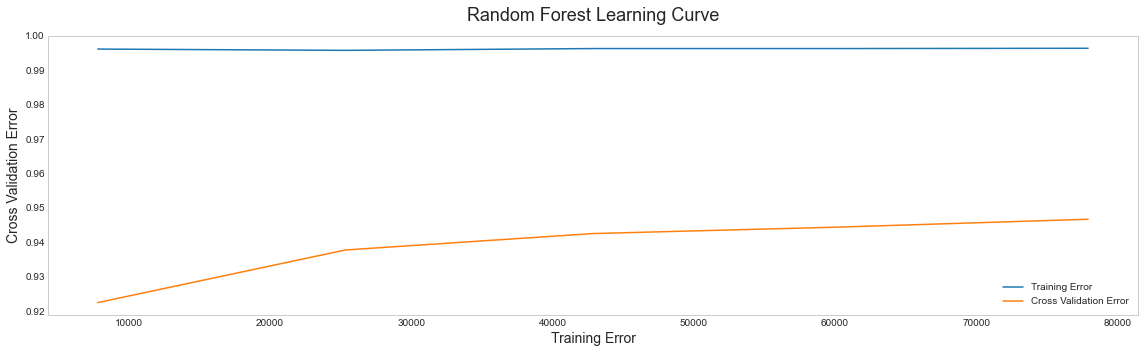

In [86]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve'
plotLearningCurves(X_train, y_train, classifier02, title)